<a href="https://colab.research.google.com/github/Alisiyyal/Portfolio-/blob/main/Copy_of_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# simple_linear_regression_with_pro_tips.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# 1. Understanding the Dataset
df = pd.read_csv("tips_sample.csv")

In [ ]:
# Check for missing values and outliers
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  10 non-null     float64
 1   tip         10 non-null     float64
 2   sex         10 non-null     object 
 3   smoker      10 non-null     object 
 4   day         10 non-null     object 
 5   time        10 non-null     object 
 6   size        10 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 692.0+ bytes
None
       total_bill        tip       size
count   10.000000  10.000000  10.000000
mean    18.737000   2.811000   2.800000
std      6.457864   1.115033   0.918937
min      8.770000   1.010000   2.000000
25%     14.845000   1.970000   2.000000
50%     19.000000   3.175000   2.500000
75%     24.362500   3.452500   3.750000
max     26.880000   4.710000   4.000000


In [ ]:
print(len(df))  # or df.shape[0]
df_small = df.sample(n=min(50, len(df)), random_state=1)


10


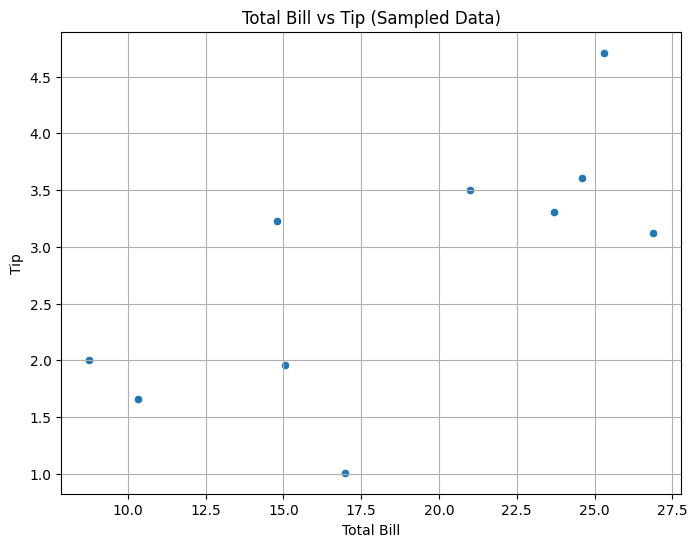

In [ ]:
# 2. Data Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df_small)
plt.title('Total Bill vs Tip (Sampled Data)')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)
plt.show()

In [ ]:
# 3. Model Building
X = df_small[['total_bill']]
y = df_small['tip']

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# 4. Model Evaluation
print("== Linear Regression ==")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

== Linear Regression ==
MSE: 0.55
R2 Score: -0.36


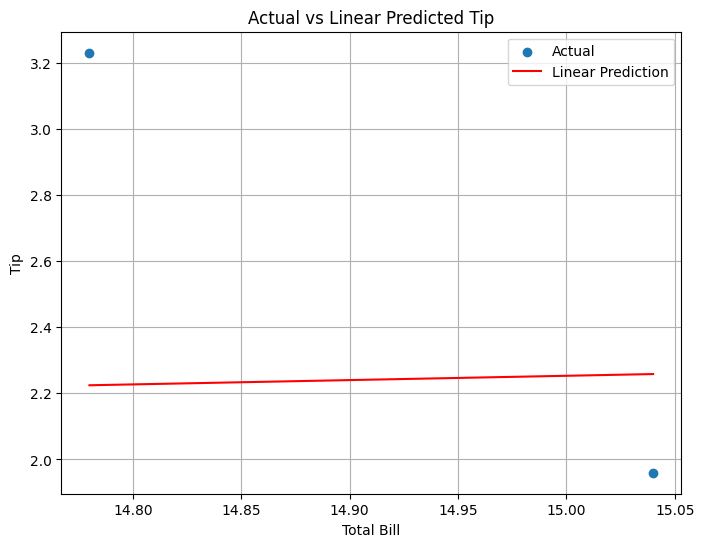

In [ ]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Linear Prediction')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Actual vs Linear Predicted Tip')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# PRO TIP 2: Experiment with another feature
print("== Linear Regression with 'size' feature ==")
X_multi = df_small[['total_bill', 'size']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_multi, y, test_size=0.2, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train2, y_train2)
y_pred_multi = model_multi.predict(X_test2)
print(f"MSE: {mean_squared_error(y_test2, y_pred_multi):.2f}")
print(f"R2 Score: {r2_score(y_test2, y_pred_multi):.2f}")


== Linear Regression with 'size' feature ==
MSE: 0.79
R2 Score: -0.95


In [ ]:
# PRO TIP 3: Polynomial regression
print("== Polynomial Regression (degree 2) ==")
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df_small[['total_bill']])
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)
y_pred_p = model_poly.predict(X_test_p)
print(f"MSE: {mean_squared_error(y_test_p, y_pred_p):.2f}")
print(f"R2 Score: {r2_score(y_test_p, y_pred_p):.2f}")

== Polynomial Regression (degree 2) ==
MSE: 0.95
R2 Score: -1.35


10
                  Model       MSE  R2 Score
0         Simple Linear  0.550069 -0.364173
1  Multi-Feature Linear  0.786359 -0.950175
2    Polynomial (deg 2)  0.945953 -1.345968


<ipython-input-23-c5649f144694>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results, palette='Set2')
<ipython-input-23-c5649f144694>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=results, palette='Set1')


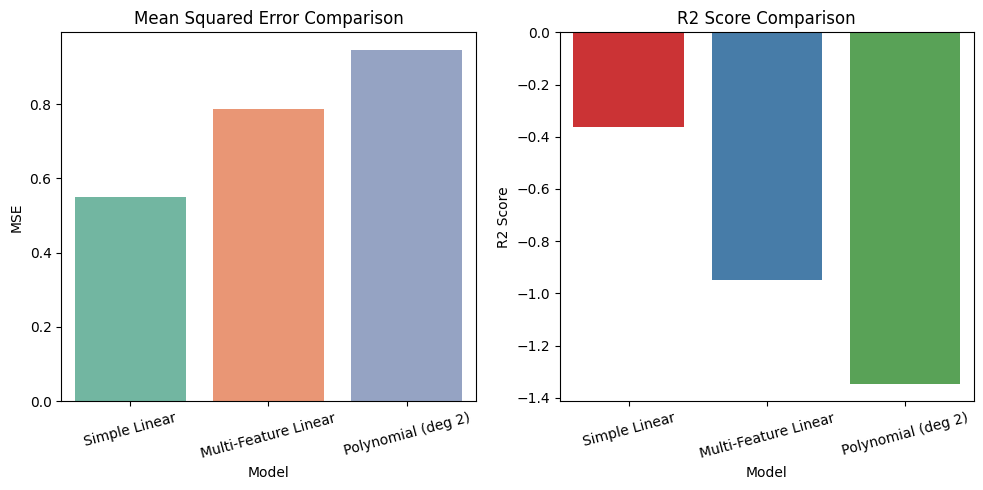

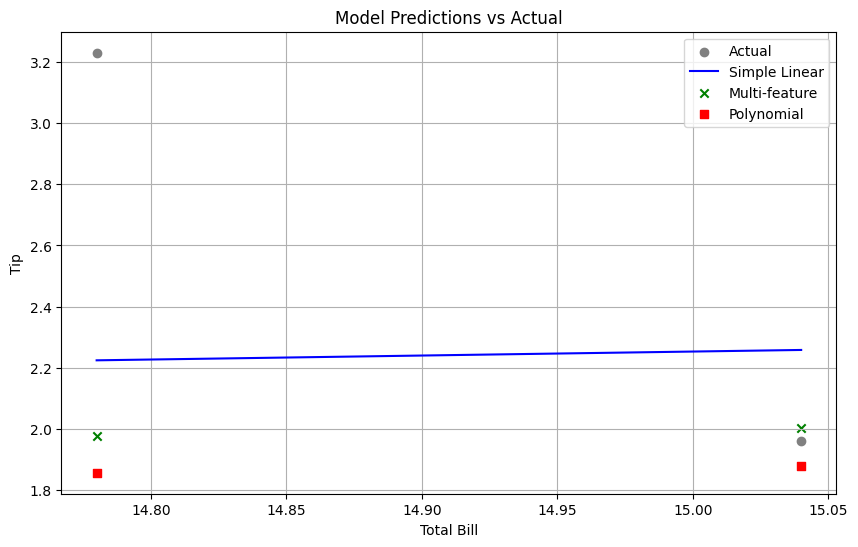

In [ ]:
# regression_results_visualized.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("tips_sample.csv")
print(len(df))  # or df.shape[0]
df_small = df.sample(n=min(50, len(df)), random_state=1)


# Independent and dependent variables
X_simple = df_small[['total_bill']]
X_multi = df_small[['total_bill', 'size']]
y = df_small['tip']

# Train-test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# ===== 1. Simple Linear Regression =====
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
r2_s = r2_score(y_test_s, y_pred_s)

# ===== 2. Multi-feature Linear Regression =====
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

# ===== 3. Polynomial Regression (degree 2) =====
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_simple)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)
y_pred_p = model_poly.predict(X_test_p)
mse_p = mean_squared_error(y_test_p, y_pred_p)
r2_p = r2_score(y_test_p, y_pred_p)

# ===== Results Summary =====
results = pd.DataFrame({
    'Model': ['Simple Linear', 'Multi-Feature Linear', 'Polynomial (deg 2)'],
    'MSE': [mse_s, mse_m, mse_p],
    'R2 Score': [r2_s, r2_m, r2_p]
})
print(results)

# ===== Visualization =====
plt.figure(figsize=(10, 5))

# Bar chart for MSE and R2
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='MSE', data=results, palette='Set2')
plt.title('Mean Squared Error Comparison')
plt.xticks(rotation=15)

plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R2 Score', data=results, palette='Set1')
plt.title('R2 Score Comparison')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

# ===== Plotting Predictions =====
plt.figure(figsize=(10, 6))
plt.scatter(X_test_s, y_test_s, label='Actual', color='gray')
plt.plot(X_test_s, y_pred_s, label='Simple Linear', color='blue')
plt.scatter(X_test_m['total_bill'], y_pred_m, label='Multi-feature', color='green', marker='x')
plt.scatter(X_test_s, y_pred_p, label='Polynomial', color='red', marker='s')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Model Predictions vs Actual')
plt.legend()
plt.grid(True)
plt.show()
